# 🏁 Pole to Podium: How F1 Champions Are Made

**QTM 151: Introduction to Statistical Computing II — Final Project**

In [23]:
# Print Names
team_members = [
    "Amanda Middelthon",
    "Anika Chandra",
    "Cassiel Chen",
    "Tianyi Zhang"
]


decorative_line = "~" * 60
print(decorative_line)
print("🌊 TEAM MEMBERS 🌊".center(60))
print(decorative_line)
for member in team_members:
    print(f"~ {member.center(56)} ~")
print(decorative_line)


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                      🌊 TEAM MEMBERS 🌊                      
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~                    Amanda Middelthon                     ~
~                      Anika Chandra                       ~
~                       Cassiel Chen                       ~
~                       Tianyi Zhang                       ~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


## Section 1: Introduction

Formula 1 (F1) is the world’s premier open‑wheel racing series, where cutting‑edge engineering, peak athlete performance, and split‑second strategy collide.  Since its inaugural season in 1950, F1 has grown into a truly global spectacle—spanning five continents and challenging drivers on a dizzying array of circuits, from high‑altitude mountain tracks to tight street courses.  Fans and analysts alike follow every qualifying session, pit stop and photo finish on [Formula1.com](https://www.formula1.com/) and in encyclopedic resources such as [Wikipedia’s Formula One page](https://en.wikipedia.org/wiki/Formula_One).

![Modern F1 Race Car](https://cdn.ferrari.com/cms/network/media/img/resize/5e5789ba4125497a8dd90672-ferrari-scuderia-f1-2020-galleries-hero-desk?width=1080)  
*Figure 1: A modern Ferrari F1 car in action*

In this notebook, we use four tables—**Drivers**, **Results**, **Circuits**, and **Races**—to answer three focused questions:

1. **Podium by Nationality**  
   Which driver nationalities have the highest rate of top‑3 finishes?

2. **Circuit Speed**  
   Which circuits (and countries) produce the fastest average race and lap times?

3. **Nationality Trends Over Time**  
   How have podium rates for the top nationalities evolved by decade?

We will first load and merge these tables (Section 2), then compute our key metrics and create summary tables and plots for each question (Section 3), and conclude with a brief discussion of our findings (Section 4).  


## Section 2: Data Description

For our analysis, we are focusing on a curated subset of the comprehensive Formula 1 dataset, which comprises 14 tables. We have selected the **Drivers**, **Races**, **Results**, and **Circuits** tables because they offer a multi-dimensional view of the sport.

- **Drivers**: Each row in this table represents a unique Formula 1 driver and includes essential details such as the driver's name, nationality, and date of birth. This table provides the backbone for understanding the personal attributes and backgrounds that influence performance on the track.

- **Races**: This table captures the details of every race event—from the race date and round to the season in which it took place. These records span the historical evolution of the sport, allowing us to track changes and trends in race conditions over the years.

- **Results**: In the **Results** table, each row details the performance of a driver in a specific race. Key metrics include finishing positions, points scored, and other race-specific data. This table is crucial for linking driver performance to individual events and understanding the outcomes.

- **Circuits**: Each row in the **Circuits** table describes a race venue, including the circuit name, location, and geographic coordinates. These details enable us to explore how track characteristics might impact race performance.

Together, these tables form a rich dataset that will allow us to merge information from different dimensions of Formula 1 racing. By analyzing these interconnected datasets, we aim to uncover insights into how driver nationality, race features, and circuit attributes collectively influence race outcomes.

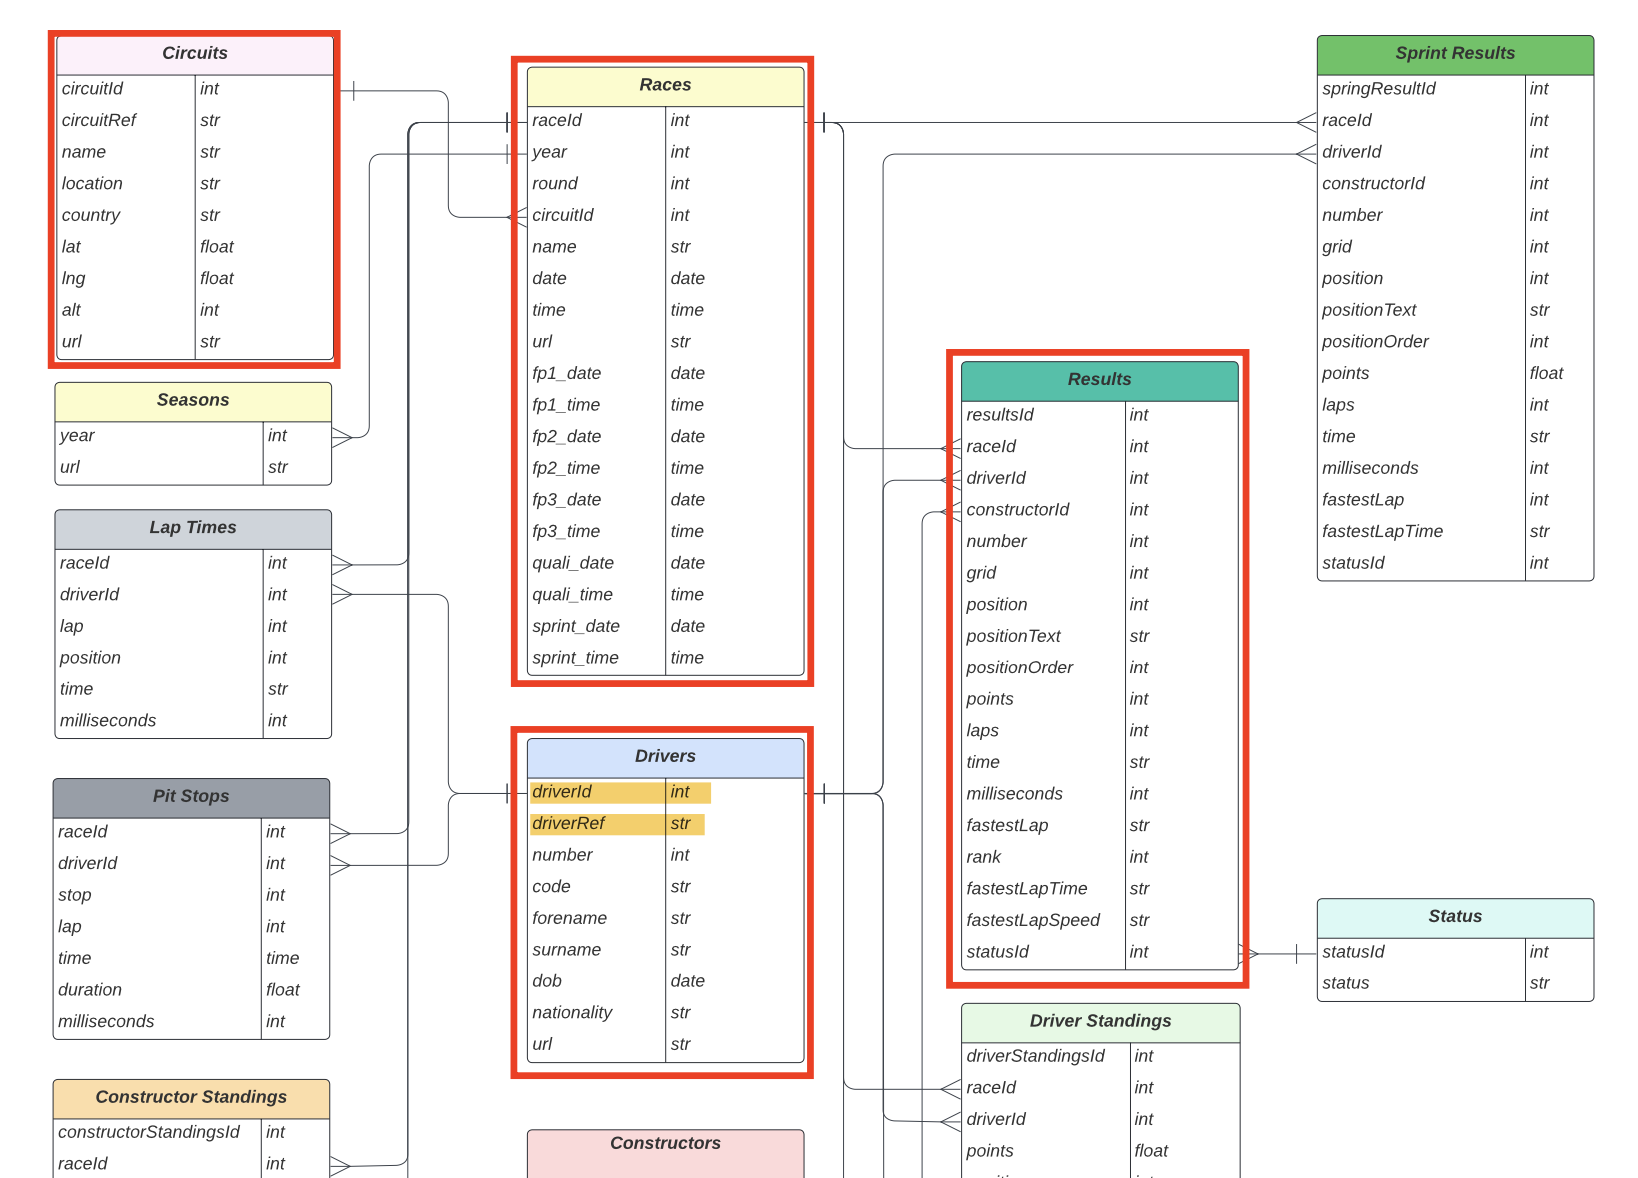
*Figure 2: Selected datasets for our study*


### 2.1 Library Imports and Directory Setup

Before beginning our analysis, we need to import several Python libraries that will help us manipulate data, perform numerical computations, and create visualizations. We also set up our environment by determining the current working directory and specifying the subfolder (`data_raw`) where our raw data is stored. 

- **Pandas** enables efficient data manipulation with its DataFrame objects.
- **NumPy** is used for handling numerical operations and computations.
- **Matplotlib** and **Seaborn** assist in creating both simple and complex visualizations.
- **OS** helps us interact with the operating system to manage file paths.

Below is the code snippet that imports these libraries, configures our plotting settings, and sets the directory for our raw data.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

current_dir = os.getcwd()
data_dir = os.path.join(current_dir, 'data_raw')

# print("Current working directory:", current_dir)
# print("Data directory:", data_dir)

### 2.2 Loading Datasets and Counting Observations

In this section, we load the selected Formula 1 datasets from our specified `data_raw` directory. We work with four key tables:

- **Drivers**: Contains information about each driver, such as name, nationality, and date of birth.
- **Races**: Records details of every race event, including the race date, round, and season.
- **Results**: Provides performance metrics for drivers in each race, such as finishing positions and points scored.
- **Circuits**: Holds details about the race circuits, including circuit name, location, and geographic coordinates.

The following code snippet reads each dataset from its corresponding CSV file and prints out the number of rows to ensure that the data has loaded correctly.


In [25]:
# Load the datasets and count the number of observations in each

# Load the Drivers dataset
drivers = pd.read_csv(os.path.join(data_dir, 'drivers.csv'))
print("Drivers dataset loaded with", drivers.shape[0], "rows.")

# Load the Races dataset
races = pd.read_csv(os.path.join(data_dir, 'races.csv'))
print("Races dataset loaded with", races.shape[0], "rows.")

# Load the Results dataset
results = pd.read_csv(os.path.join(data_dir, 'results.csv'))
print("Results dataset loaded with", results.shape[0], "rows.")

# Load the Circuits dataset
circuits = pd.read_csv(os.path.join(data_dir, 'circuits.csv'))
print("Circuits dataset loaded with", circuits.shape[0], "rows.")


Drivers dataset loaded with 857 rows.
Races dataset loaded with 1102 rows.
Results dataset loaded with 25840 rows.
Circuits dataset loaded with 77 rows.


The Drivers dataset contains 857 rows, Races has 1102 rows, Results includes 25840 rows, and Circuits comprises 77 rows.

### 2.3 'Drivers' Dataset Exploration

The **Drivers** dataset contains information for each unique Formula 1 driver, such as their name, nationality, and date of birth. In the code below, we display the first five rows, the detailed dataset information (data types and non-null counts), and summary statistics to understand the structure and composition of the data.


In [26]:
# Preview the first 5 rows of the Drivers dataset
print("Drivers dataset loaded with", drivers.shape[0], "rows.")
print("First 5 Rows of the Drivers Dataset:")
print(drivers.head())

Drivers dataset loaded with 857 rows.
First 5 Rows of the Drivers Dataset:
   driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen  


Above is a snapshot of the first five rows from the Drivers dataset, which comprises 857 records in total. Each row represents a unique Formula 1 driver and includes key information such as the internal driver ID, an external reference, the driver's racing number (which may be absent in some cases), a short driver code, first name, last name, date of birth, nationality, and a URL linking to their Wikipedia page. For instance, the first entry in this dataset corresponds to Lewis Hamilton, one of the sport’s most celebrated figures. To honor his legacy, we also include an image of him below.

![Lewis Hamilton](https://media.formula1.com/image/upload/f_auto,c_limit,q_auto,w_1320/content/dam/fom-website/drivers/2025Drivers/hamilton)
*Figure 3: Picture of Lewis Hamilton - F1 Driver for Ferrari*

In [27]:
# Display dataset information
print("Dataset Information:")
drivers.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


The Drivers dataset has 857 entries with nine key columns: **driverId** (int), **driverRef** (string), **number** (string), **code** (string), **forename** (string), **surname** (string), **dob** (date), **nationality** (string), and **url** (string). 

Although every row in the Drivers dataset is populated, you may notice that some fields (e.g., in the "number" column) display "\N". This placeholder is used to indicate missing or unavailable data. While the dataset shows 857 non-null entries for each column, these "\N" entries effectively represent null values. For accurate analysis, it can be beneficial to replace "\N" with a standard null value (e.g., NaN) during data preprocessing.


In [28]:
# Display summary statistics for the Drivers dataset
print("Summary Statistics:")
print(drivers.describe(include='all'))


Summary Statistics:
          driverId driverRef number code forename surname         dob  \
count   857.000000       857    857  857      857     857         857   
unique         NaN       857     45   95      476     798         839   
top            NaN  hamilton     \N   \N     John  Taylor  1935-07-23   
freq           NaN         1    803  757       14       5           2   
mean    429.057176       NaN    NaN  NaN      NaN     NaN         NaN   
std     247.632402       NaN    NaN  NaN      NaN     NaN         NaN   
min       1.000000       NaN    NaN  NaN      NaN     NaN         NaN   
25%     215.000000       NaN    NaN  NaN      NaN     NaN         NaN   
50%     429.000000       NaN    NaN  NaN      NaN     NaN         NaN   
75%     643.000000       NaN    NaN  NaN      NaN     NaN         NaN   
max     858.000000       NaN    NaN  NaN      NaN     NaN         NaN   

       nationality                                          url  
count          857                   

The summary statistics for the Drivers dataset provide an essential glimpse into its structure and complexity. For numeric fields like **driverId**, the summary presents standard measures such as count, mean, standard deviation, and range, giving an idea of the distribution across entries. For categorical fields (e.g., **driverRef**, **forename**, **surname**, **nationality**, **url**), the summary returns the count, number of unique values, most frequent value, and its frequency. These details reveal that while each driver has a unique identifier, many other fields have high cardinality, reflecting the diversity of driver names and attributes. Notably, all columns have a full count of non-null entries, indicating that the dataset is complete and free of missing values. Overall, the summary provides clear evidence of a well-structured dataset with a balanced mix of numeric and descriptive data, ready for further analysis.

### 2.4 'Races' Dataset Exploration

#### Races Table Schema

From the Ergast codebook, the **races** table is defined with 18 columns:

| Field          | Type           | Null | Key | Default    | Description                                |
|---------------:|:---------------|:-----|:----|:-----------|:-------------------------------------------|
| `raceId`       | `int(11)`      | NO   | PRI | —          | Primary key (auto-increment)               |
| `year`         | `int(11)`      | NO   |     | 0          | Championship season (e.g. 1950)            |
| `round`        | `int(11)`      | NO   |     | 0          | Sequence number within the season          |
| `circuitId`    | `int(11)`      | NO   |     | 0          | Foreign key → `circuits.circuitId`         |
| `name`         | `varchar(255)` | NO   |     | —          | Official race name (e.g. “Monaco Grand Prix”) |
| `date`         | `date`         | NO   |     | `0000-00-00` | Race date (ISO format)                     |
| `time`         | `time`         | YES  |     | —          | Scheduled start time                       |
| `url`          | `varchar(255)` | YES  | UNI | —          | Wikipedia link for the event               |
| `fp1_date`     | `date`         | YES  |     | —          | Free Practice 1 date                       |
| `fp1_time`     | `time`         | YES  |     | —          | Free Practice 1 start time                 |
| `fp2_date`     | `date`         | YES  |     | —          | Free Practice 2 date                       |
| `fp2_time`     | `time`         | YES  |     | —          | Free Practice 2 start time                 |
| `fp3_date`     | `date`         | YES  |     | —          | Free Practice 3 date                       |
| `fp3_time`     | `time`         | YES  |     | —          | Free Practice 3 start time                 |
| `quali_date`   | `date`         | YES  |     | —          | Qualifying session date                    |
| `quali_time`   | `time`         | YES  |     | —          | Qualifying start time                      |
| `sprint_date`  | `date`         | YES  |     | —          | Sprint race date                           |
| `sprint_time`  | `time`         | YES  |     | —          | Sprint race start time                     |


- The first seven fields (`raceId` through `time`) are all non-nullable and form the core metadata we need for merging and analysis.
- All session-specific fields (`fp*`, `quali*`, `sprint*`) allow NULL and are often unused in early seasons; we can ignore or clean these when focusing on main race data.

This schema confirms that our primary keys and join fields are complete and ready for the merges required by our three focused research questions.  

#### Data Exploration

The **Races** dataset captures one row per Grand Prix and includes key scheduling and identification fields—such as `raceId`, `year`, `round`, `circuitId`, `name`, `date`, and `time`. In the code below, we display the first five rows to see the earliest events, call `.info()` to check data types and non‑null counts, and use `.describe(include='all')` to review summary statistics across both numeric and categorical columns.  


In [29]:
# Preview the first 5 rows of the Races dataset
print("Races dataset loaded with", races.shape[0], "rows.")
print("First 5 Rows of the Races Dataset:")
print(races.head(), "\n")

Races dataset loaded with 1102 rows.
First 5 Rows of the Races Dataset:
   raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   

       time                                                url fp1_date  \
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...       \N   
2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...       \N   
3  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...       \N   
4  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...       \N   

  fp1_time fp2_date fp2_time fp3_date fp3_ti

The code snippet above displays the first five rows of the **Races** table, confirming that each row represents one Grand Prix event. In our sample, we see the opening five races of the 2009 season (Australian, Malaysian, Chinese, Bahrain, Spanish). Key columns—`raceId`, `year`, `round`, `circuitId`, `name`, `date`, `time`, and `url`—are all present and properly formatted. This quick look verifies that our core scheduling and identification fields loaded correctly and are ready for the merges required by our analysis.


In [30]:
print("Dataset Information:")
races.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1102 non-null   int64 
 1   year         1102 non-null   int64 
 2   round        1102 non-null   int64 
 3   circuitId    1102 non-null   int64 
 4   name         1102 non-null   object
 5   date         1102 non-null   object
 6   time         1102 non-null   object
 7   url          1102 non-null   object
 8   fp1_date     1102 non-null   object
 9   fp1_time     1102 non-null   object
 10  fp2_date     1102 non-null   object
 11  fp2_time     1102 non-null   object
 12  fp3_date     1102 non-null   object
 13  fp3_time     1102 non-null   object
 14  quali_date   1102 non-null   object
 15  quali_time   1102 non-null   object
 16  sprint_date  1102 non-null   object
 17  sprint_time  1102 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.1+ KB

The output shows **1,102** total entries (index 0–1101) and **18** columns, using about 155 KB of memory. Four integer columns (`raceId`, `year`, `round`, `circuitId`) are fully populated with no missing values, providing robust join keys and season metadata. The other 14 object-type columns include race names, dates/times, and URLs, while the practice (`fp1_*`, `fp2_*`, `fp3_*`), qualifying (`quali_*`), and sprint (`sprint_*`) fields uniformly contain the placeholder “\N” where session data is unavailable. Overall, the completeness of the core fields and clearly marked placeholders for secondary sessions satisfy our assignment’s requirement to document data structure and readiness for analysis.  

In [31]:
print("\nSummary Statistics:")
print(races.describe(include='all'))


Summary Statistics:
             raceId         year        round    circuitId  \
count   1102.000000  1102.000000  1102.000000  1102.000000   
unique          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN   
mean     553.853902  1992.049002     8.507260    23.697822   
std      321.706151    20.308639     5.097545    19.337398   
min        1.000000  1950.000000     1.000000     1.000000   
25%      276.250000  1976.000000     4.000000     9.000000   
50%      551.500000  1994.000000     8.000000    18.000000   
75%      826.750000  2010.000000    12.000000    34.000000   
max     1120.000000  2023.000000    23.000000    80.000000   

                      name        date  time  \
count                 1102        1102  1102   
unique                  54        1102    34   
top     Italian Grand Prix  2009-03-29    \N   
freq                    74           1   7

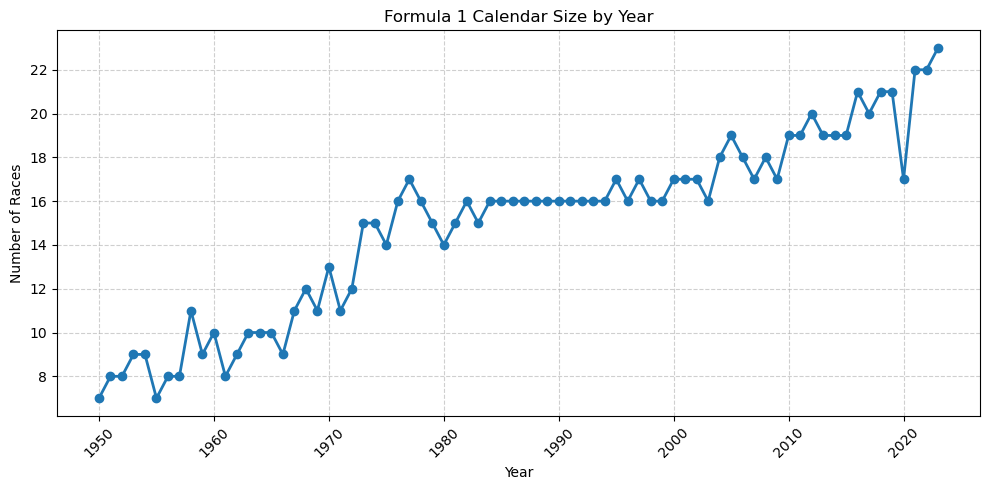

In [35]:
# Compute number of races per year
races_per_year = races['year'].value_counts().sort_index()

# Improved aesthetics
plt.figure(figsize=(10, 5))
plt.plot(races_per_year.index, races_per_year.values, marker='o', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.title('Formula 1 Calendar Size by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The plot shows how the F1 calendar has steadily expanded since 1950. In the inaugural season there were just seven races; through the 1960s it crept into the low‑10s before jumping to around 15–16 events by the mid‑1970s. From the 1980s through the 1990s the schedule held fairly constant at roughly 16 Grands Prix per year, then climbed again in the 2000s and 2010s into the high‑teens and low‑20s. You can also spot the COVID‑related dip in 2020 (down to 17 races), followed by a post‑pandemic surge peaking at 23 races in 2023. Overall, this upward trend underscores F1’s continual global growth and growing commercial appeal.


### 'Results' Dataset Exploration

The **Results** dataset catalogs driver performance metrics for each race (e.g., finishing positions, points scored). The exploration code below examines this dataset by displaying its first five rows, detailed dataset information, and summary statistics, providing insights into the various performance metrics available.


In [32]:
# Display first 5 rows of Results
print("### Results Dataset ###\n")
print("First 5 Rows:")
display(results.head())

# Dataset Information for Results
print("\nDataset Information:")
results_info = get_df_info(results)
print(results_info)

# Summary Statistics for Results
print("Summary Statistics:")
display(results.describe(include='all'))


### Results Dataset ###

First 5 Rows:


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1



Dataset Information:


NameError: name 'get_df_info' is not defined

### Circuits Dataset Exploration

The **Circuits** dataset contains data on race circuits, including circuit names, locations, and geographic coordinates. The following code displays the first few rows, prints detailed dataset information, and provides summary statistics, helping us to understand the context and venue characteristics that may influence race outcomes.


In [24]:
# Display first 5 rows of Circuits
print("### Circuits Dataset ###\n")
print("First 5 Rows:")
display(circuits.head())

# Dataset Information for Circuits
print("\nDataset Information:")
circuits_info = get_df_info(circuits)
print(circuits_info)

# Summary Statistics for Circuits
print("Summary Statistics:")
display(circuits.describe(include='all'))


### Circuits Dataset ###

First 5 Rows:


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     object 
 8   url         77 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.5+ KB

Summary Statistics:


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
count,77.000000,77,77,77,77,77.000000,77.000000,77,77
unique,NaN,77,77,75,35,NaN,NaN,66,77
top,NaN,albert_park,Albert Park Grand Prix Circuit,Barcelona,USA,NaN,NaN,18,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
freq,NaN,1,1,2,11,NaN,NaN,3,1
mean,39.883117,NaN,NaN,NaN,NaN,33.442925,1.076683,NaN,NaN
std,23.001701,NaN,NaN,NaN,NaN,22.808866,65.516951,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,-37.849700,-118.189000,NaN,NaN
25%,20.000000,NaN,NaN,NaN,NaN,32.777400,-9.394170,NaN,NaN
50%,40.000000,NaN,NaN,NaN,NaN,40.951700,3.930830,NaN,NaN
75%,59.000000,NaN,NaN,NaN,NaN,46.958900,19.248600,NaN,NaN
